In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score, make_scorer
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [ ]:
df = pd.read_csv('CBWDB.csv')
df

SEC  Age(years)  Height(cm)  Bgroup  Parity  ANC  Iwt(kg)  FWt(kg)  \
0     BPL        23.0       146.0  A(+ve)     1.0  4.0     34.0     42.0   
1     BPL        25.0       165.0     NIL     1.0  3.0     68.0     71.0   
2     BPL        24.0       155.0  B(+ve)     1.0  3.0     49.0     55.0   
3     BPL        19.0       154.0     NIL     1.0  2.0     49.0     50.0   
4     BPL        21.0       150.0     NIL     1.0  4.0     41.0     48.0   
...   ...         ...         ...     ...     ...  ...      ...      ...   
1795  BPL        26.0         NaN     NaN     0.0  3.0     39.0     40.0   
1796  BPL        22.0         NaN     NaN     0.0  NaN      NaN      NaN   
1797  BPL        24.0         NaN     NaN     1.0  NaN      NaN      NaN   
1798  BPL        24.0         NaN     NaN     2.0  NaN      NaN      NaN   
1799  BPL        23.0         NaN     NaN     1.0  NaN      NaN      NaN   

      IBP_sys  IBP_dias  FBP_sys  FBP_dias  IHb(gm%)  FHb(gm%)  BS(RBS)  \
0       116.0      78.0    120.0      70.0      10.0      13.2     90.0   
1        96.0      70.0    110.0      72.0      10.4      11.0     96.0   
2        91.0      52.0    110.0      70.0      11.0      11.6    102.0   
3        90.0      52.0    100.0      60.0      10.0      10.6    103.0   
4       100.0      60.0    110.0      70.0       9.0      10.2     99.0   
...       ...       ...      ...       ...       ...       ...      ...   
1795    110.0      78.0    112.0      80.0       NaN       NaN      NaN   
1796      NaN       NaN      NaN       NaN       NaN       NaN      NaN   
1797      NaN       NaN      NaN       NaN       NaN       NaN      NaN   
1798      NaN       NaN      NaN       NaN       NaN       NaN      NaN   
1799      NaN       NaN      NaN       NaN       NaN       NaN      NaN   

     Term/Preterm  Sex  BWt(kg)  LNH  
0               T    F      2.7  2.0  
1               T    M      2.9  2.0  
2               T    M      2.4  1.0  
3               T    F      2.6  2.0  
4               T    F      2.3  1.0  
...           ...  ...      ...  ...  
1795          NaN  NaN      NaN  NaN  
1796          NaN  NaN      NaN  NaN  
1797          NaN  NaN      NaN  NaN  
1798          NaN  NaN      NaN  NaN  
1799          NaN  NaN      NaN  NaN  

[1800 rows x 19 columns]

In [ ]:
def Summary(df):
    df_inf = pd.DataFrame({"UniqueValues":df.nunique(), "NullValues": df.isnull().sum(), "DataTypes": df.dtypes, "Count": df.count()}).sort_values(by='UniqueValues', ascending=False)
    return pd.concat([df_inf, df.describe().T], axis=1)

Summary(df)

UniqueValues  NullValues DataTypes  Count   count        mean  \
BS(RBS)                 83        1192   float64    608   608.0  100.898026   
Height(cm)              59         273   float64   1527  1527.0  143.785855   
IBP_sys                 59          40   float64   1760  1760.0  108.032386   
FBP_sys                 55          51   float64   1749  1749.0  111.819325   
IHb(gm%)                55         405   float64   1395  1395.0    9.919398   
FBP_dias                52          52   float64   1748  1748.0   69.405606   
FHb(gm%)                52         407   float64   1393  1393.0   10.401651   
IBP_dias                48          40   float64   1760  1760.0   66.091477   
FWt(kg)                 48          61   float64   1739  1739.0   51.645371   
Iwt(kg)                 45          49   float64   1751  1751.0   45.749857   
BWt(kg)                 36         728   float64   1072  1072.0    2.759580   
Age(years)              28          14   float64   1786  1786.0   22.986002   
Bgroup                  13        1002    object    798     NaN         NaN   
Parity                   7          33   float64   1767  1767.0    0.667233   
ANC                      4          19   float64   1781  1781.0    3.423358   
Sex                      3         658    object   1142     NaN         NaN   
LNH                      3         728   float64   1072  1072.0    1.871269   
Term/Preterm             3         838    object    962     NaN         NaN   
SEC                      2         650    object   1150     NaN         NaN   

                    std   min    25%    50%    75%    max  
BS(RBS)       17.251874  12.0   93.0  100.0  109.0  240.0  
Height(cm)    19.702879  10.0  135.0  150.0  150.0  195.0  
IBP_sys       12.021658  10.0  100.0  110.0  112.0  196.0  
FBP_sys       11.809435  10.0  110.0  110.0  120.0  160.0  
IHb(gm%)       1.052058   6.0    9.2   10.0   10.6   13.0  
FBP_dias       9.249682  10.0   60.0   70.0   78.0  117.0  
FHb(gm%)       0.989487   1.5   10.0   10.4   11.0   13.2  
IBP_dias       8.263232  14.0   60.0   66.0   70.0  100.0  
FWt(kg)        6.905943  30.0   47.0   51.0   55.0  100.0  
Iwt(kg)        6.655457  30.0   41.0   45.0   50.0   93.0  
BWt(kg)        0.430413   0.5    2.5    2.7    3.0    4.5  
Age(years)     4.050843   8.0   20.0   22.0   25.0   55.0  
Bgroup              NaN   NaN    NaN    NaN    NaN    NaN  
Parity         0.993277   0.0    0.0    0.0    1.0    6.0  
ANC            0.889005   1.0    3.0    4.0    4.0    4.0  
Sex                 NaN   NaN    NaN    NaN    NaN    NaN  
LNH            0.346026   1.0    2.0    2.0    2.0    3.0  
Term/Preterm        NaN   NaN    NaN    NaN    NaN    NaN  
SEC                 NaN   NaN    NaN    NaN    NaN    NaN

In [ ]:
# Remove duplicate rows
print('initial shape', df.shape, end='\t')
df.drop_duplicates(inplace=True)
print('shape after removing duplicates', df.shape)

initial shape (1800, 19)	shape after removing duplicates (1795, 19)


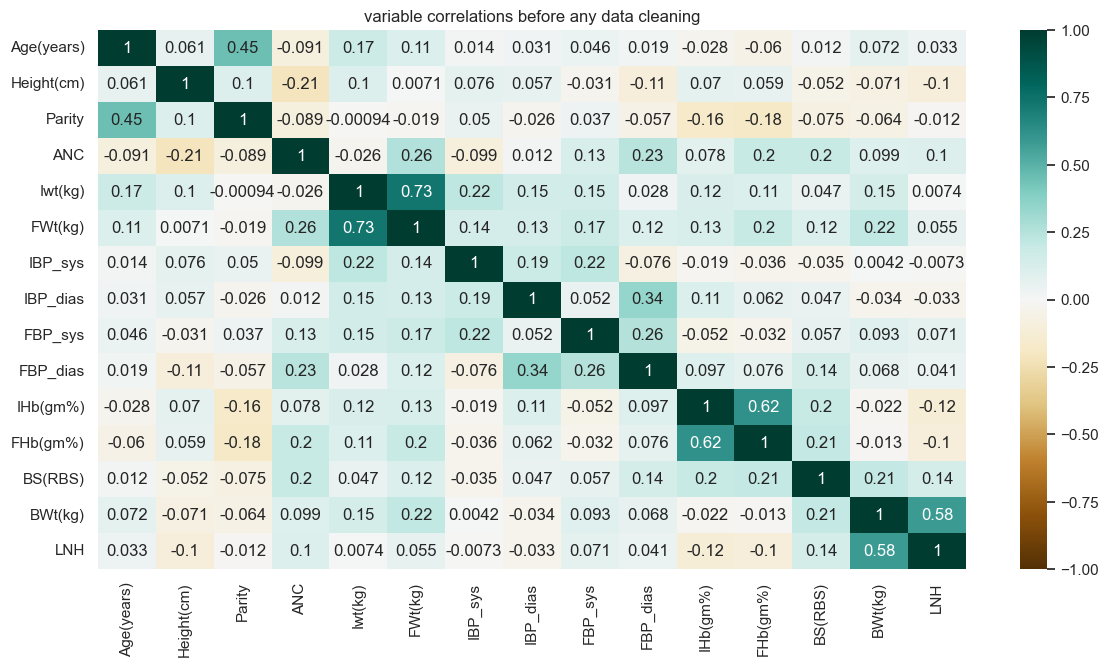

In [ ]:
def plot_corr(df):
    plt.figure(figsize=(14,7))
    plt.title("variable correlations before any data cleaning")
    sns.heatmap(data=df.corr(), cmap='BrBG', vmin=-1, vmax=1, annot=True);
plot_corr(df)

In [ ]:
# Number of rows dosent have any value for target variable
print(df['LNH'].isnull().sum())

728


In [ ]:
# remove rows that dosent have any value for target variable
df = df.dropna(axis=0, subset=['LNH'])
print('shape after removing rows with empty value for target', df.shape)

shape after removing rows with empty value for target (1067, 19)


In [ ]:
df['LNH'].isnull().sum()

0

In [ ]:
# Check for categorical columns for miss typing and other errors
categorical_ix = df.select_dtypes(exclude=['int64', 'float64']).columns
categorical_ix

for col in categorical_ix:
    print(col, df[col].value_counts())

NameError: name 'df' is not defined

In [ ]:
# for Blood Group NIL values are null values indeed. then replace them with NaN
df.loc[df['Bgroup'] == 'NIL', 'Bgroup'] = np.nan

# change all variable typing to one form
df.loc[df['Bgroup'] == 'A(+VE)', 'Bgroup'] = 'A(+ve)'
df.loc[((df['Bgroup'] == 'B(+VE)') | (df['Bgroup'] ==  'B+(+ve)')), 'Bgroup'] = 'B(+ve)'
df.loc[df['Bgroup'] == 'O(+VE)', 'Bgroup'] = 'O(+ve)'

# there is a one row that missplled T with t. change it back
df.loc[df['Term/Preterm'] == 't', 'Term/Preterm'] = 'T'

# there is two rows that has T value for sex. replace it with NaN
df.loc[df['Sex'] == 'T', 'Sex'] = np.nan


In [ ]:
# drop rows that contain more null values than 50% of columns
df = df.dropna(thresh=int(df.shape[1]*0.5), axis=0)

In [ ]:
# drop columns that contain more null values than 50% of rows
df = df.dropna(thresh=int(df.shape[0]*0.5), axis=1)

In [ ]:
Summary(df)

UniqueValues  NullValues DataTypes  Count   count        mean  \
BS(RBS)                 76         526   float64    541   541.0  101.874307   
Height(cm)              55         123   float64    944   944.0  142.078390   
IBP_sys                 52           4   float64   1063  1063.0  105.939793   
IHb(gm%)                50         103   float64    964   964.0   10.044388   
FHb(gm%)                50         102   float64    965   965.0   10.580207   
FBP_sys                 47           6   float64   1061  1061.0  111.101791   
Iwt(kg)                 43          12   float64   1055  1055.0   45.626540   
FWt(kg)                 43          13   float64   1054  1054.0   52.536338   
FBP_dias                43           6   float64   1061  1061.0   70.597549   
IBP_dias                40           4   float64   1063  1063.0   65.867357   
BWt(kg)                 36           0   float64   1067  1067.0    2.759859   
Age(years)              28           3   float64   1064  1064.0   22.818609   
Parity                   7           0   float64   1067  1067.0    0.592315   
ANC                      4           0   float64   1067  1067.0    3.717901   
LNH                      3           0   float64   1067  1067.0    1.870665   
Sex                      2          13    object   1054     NaN         NaN   
Term/Preterm             2         133    object    934     NaN         NaN   
SEC                      2         200    object    867     NaN         NaN   

                    std   min    25%    50%    75%    max  
BS(RBS)       15.512925  12.0   94.0  101.0  110.0  159.0  
Height(cm)    18.361984  10.0  135.0  146.0  150.0  195.0  
IBP_sys       12.393279  10.0  100.0  110.0  110.0  188.0  
IHb(gm%)       1.052668   6.0    9.4   10.0   11.0   12.2  
FHb(gm%)       1.001602   1.5   10.0   10.8   11.2   13.2  
FBP_sys       13.187079  10.0  110.0  110.0  120.0  150.0  
Iwt(kg)        6.772170  30.0   41.0   45.0   50.0   77.0  
FWt(kg)        6.690861  34.0   48.0   52.0   56.0   81.0  
FBP_dias       8.607870  40.0   62.0   70.0   80.0  117.0  
IBP_dias       7.718829  40.0   60.0   68.0   70.0  100.0  
BWt(kg)        0.431228   0.5    2.5    2.7    3.0    4.5  
Age(years)     4.286976   8.0   20.0   22.0   25.0   55.0  
Parity         0.934866   0.0    0.0    0.0    1.0    6.0  
ANC            0.626261   1.0    4.0    4.0    4.0    4.0  
LNH            0.346724   1.0    2.0    2.0    2.0    3.0  
Sex                 NaN   NaN    NaN    NaN    NaN    NaN  
Term/Preterm        NaN   NaN    NaN    NaN    NaN    NaN  
SEC                 NaN   NaN    NaN    NaN    NaN    NaN

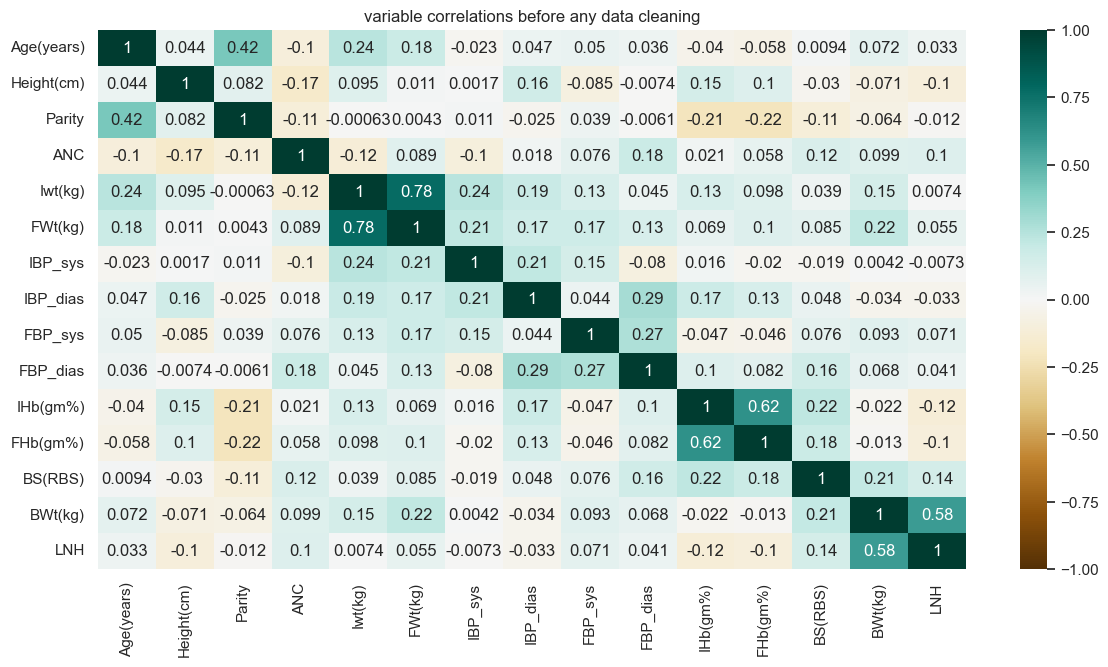

In [ ]:
plot_corr(df)

In [ ]:
print(df[df['LNH']==3]['BWt(kg)'].max(), df[df['LNH']==3]['BWt(kg)'].min())
print(df[df['LNH']==2]['BWt(kg)'].max(), df[df['LNH']==2]['BWt(kg)'].min())
print(df[df['LNH']==1]['BWt(kg)'].max(), df[df['LNH']==1]['BWt(kg)'].min())

4.5 4.0
4.5 0.5
3.0 1.0


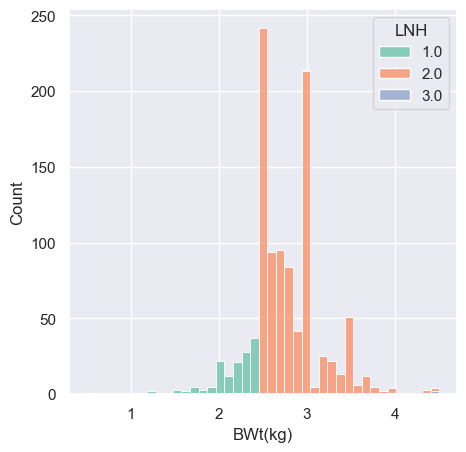

In [ ]:
plt.figure(figsize=(5, 5))
sns.histplot(data=df, x='BWt(kg)', hue='LNH', multiple='stack', palette='Set2');


In [ ]:
# above figure shows that "BWt(kg)" column describe target variable, and target variable actually is discretized version of "BWt(kg)"
df.drop(columns=["BWt(kg)"], inplace=True)
df

SEC  Age(years)  Height(cm)  Parity  ANC  Iwt(kg)  FWt(kg)  IBP_sys  \
0     BPL        23.0       146.0     1.0  4.0     34.0     42.0    116.0   
1     BPL        25.0       165.0     1.0  3.0     68.0     71.0     96.0   
2     BPL        24.0       155.0     1.0  3.0     49.0     55.0     91.0   
3     BPL        19.0       154.0     1.0  2.0     49.0     50.0     90.0   
4     BPL        21.0       150.0     1.0  4.0     41.0     48.0    100.0   
...   ...         ...         ...     ...  ...      ...      ...      ...   
1785  BPL        18.0         NaN     0.0  4.0     35.0     43.0    100.0   
1786  BPL        16.0         NaN     0.0  4.0     37.0     45.0    100.0   
1787  BPL        25.0         NaN     1.0  4.0     40.0     45.0    110.0   
1788  NaN        26.0         NaN     2.0  4.0     42.0     46.0    100.0   
1789  BPL        25.0         NaN     3.0  1.0     40.0     40.0    106.0   

      IBP_dias  FBP_sys  FBP_dias  IHb(gm%)  FHb(gm%)  BS(RBS) Term/Preterm  \
0         78.0    120.0      70.0      10.0      13.2     90.0            T   
1         70.0    110.0      72.0      10.4      11.0     96.0            T   
2         52.0    110.0      70.0      11.0      11.6    102.0            T   
3         52.0    100.0      60.0      10.0      10.6    103.0            T   
4         60.0    110.0      70.0       9.0      10.2     99.0            T   
...        ...      ...       ...       ...       ...      ...          ...   
1785      70.0    120.0      80.0      10.0      10.0      NaN            T   
1786      70.0    120.0      80.0      10.0      10.0      NaN            T   
1787      76.0    126.0      90.0       9.5       9.5      NaN            T   
1788      70.0    120.0      86.0       9.0       9.0      NaN            T   
1789      70.0    106.0      70.0       9.8       9.8      NaN            T   

     Sex  LNH  
0      F  2.0  
1      M  2.0  
2      M  1.0  
3      F  2.0  
4      F  1.0  
...   ..  ...  
1785   M  2.0  
1786   M  2.0  
1787   M  2.0  
1788   F  2.0  
1789   M  2.0  

[1067 rows x 17 columns]

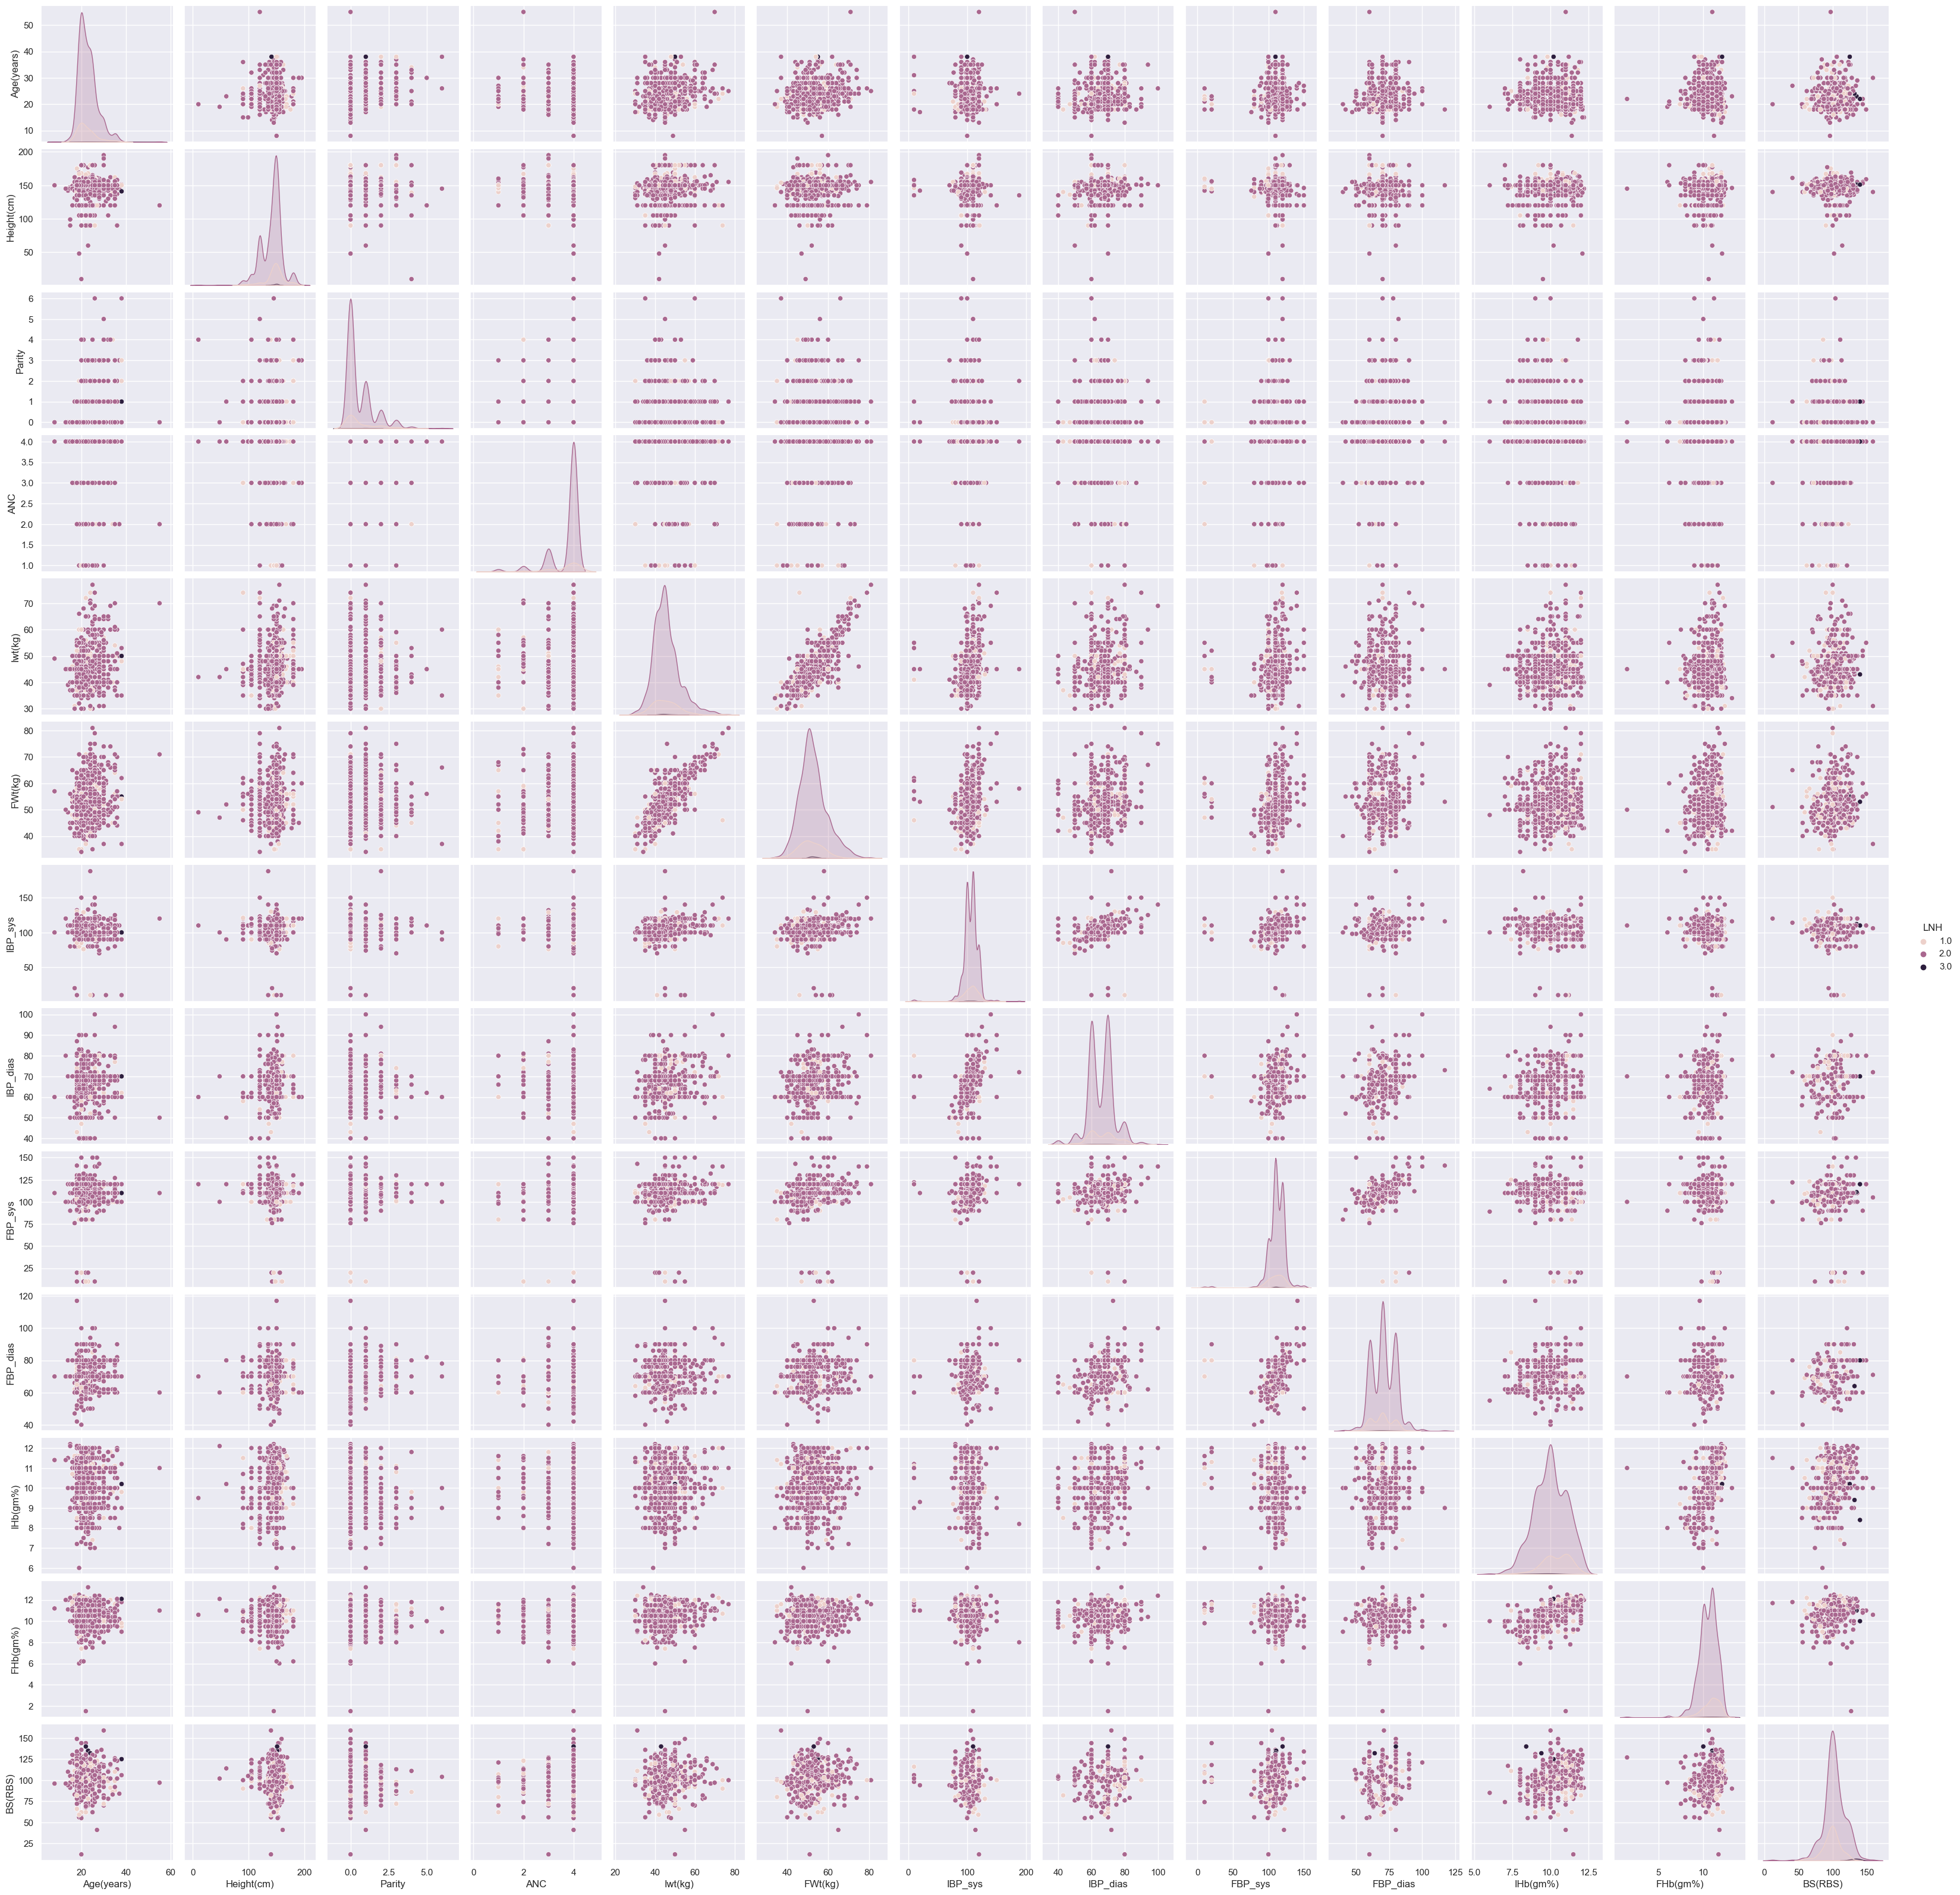

In [ ]:
sns.pairplot(df, hue='LNH');

In [ ]:
categorical = df.select_dtypes(exclude=['int64', 'float64']).columns
numerical = df.select_dtypes(include=['int64', 'float64']).columns

df[categorical] = df[categorical].apply(lambda series: pd.Series(
    LabelEncoder().fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
))

imp_num = IterativeImputer(estimator=RandomForestRegressor(),
                            initial_strategy='mean',
                            max_iter=10, random_state=0)
imp_cat = IterativeImputer(estimator=RandomForestClassifier(),
                            initial_strategy='most_frequent',
                            max_iter=10, random_state=0)

df[numerical] = imp_num.fit_transform(df[numerical])
df[categorical] = imp_cat.fit_transform(df[categorical])

df

SEC  Age(years)  Height(cm)  Parity  ANC  Iwt(kg)  FWt(kg)  IBP_sys  \
0     1.0        23.0      146.00     1.0  4.0     34.0     42.0    116.0   
1     1.0        25.0      165.00     1.0  3.0     68.0     71.0     96.0   
2     1.0        24.0      155.00     1.0  3.0     49.0     55.0     91.0   
3     1.0        19.0      154.00     1.0  2.0     49.0     50.0     90.0   
4     1.0        21.0      150.00     1.0  4.0     41.0     48.0    100.0   
...   ...         ...         ...     ...  ...      ...      ...      ...   
1785  1.0        18.0      140.96     0.0  4.0     35.0     43.0    100.0   
1786  1.0        16.0      143.27     0.0  4.0     37.0     45.0    100.0   
1787  1.0        25.0      133.48     1.0  4.0     40.0     45.0    110.0   
1788  1.0        26.0      139.43     2.0  4.0     42.0     46.0    100.0   
1789  1.0        25.0      144.80     3.0  1.0     40.0     40.0    106.0   

      IBP_dias  FBP_sys  FBP_dias  IHb(gm%)  FHb(gm%)  BS(RBS)  Term/Preterm  \
0         78.0    120.0      70.0      10.0      13.2    90.00           1.0   
1         70.0    110.0      72.0      10.4      11.0    96.00           1.0   
2         52.0    110.0      70.0      11.0      11.6   102.00           1.0   
3         52.0    100.0      60.0      10.0      10.6   103.00           1.0   
4         60.0    110.0      70.0       9.0      10.2    99.00           1.0   
...        ...      ...       ...       ...       ...      ...           ...   
1785      70.0    120.0      80.0      10.0      10.0   102.36           1.0   
1786      70.0    120.0      80.0      10.0      10.0   102.64           1.0   
1787      76.0    126.0      90.0       9.5       9.5    95.94           1.0   
1788      70.0    120.0      86.0       9.0       9.0    96.36           1.0   
1789      70.0    106.0      70.0       9.8       9.8    89.83           1.0   

      Sex  LNH  
0     0.0  2.0  
1     1.0  2.0  
2     1.0  1.0  
3     0.0  2.0  
4     0.0  1.0  
...   ...  ...  
1785  1.0  2.0  
1786  1.0  2.0  
1787  1.0  2.0  
1788  0.0  2.0  
1789  1.0  2.0  

[1067 rows x 17 columns]

In [ ]:
Summary(df)

UniqueValues  NullValues DataTypes  Count   count        mean  \
BS(RBS)                569           0   float64   1067  1067.0   99.826863   
Height(cm)             169           0   float64   1067  1067.0  141.768688   
IHb(gm%)               152           0   float64   1067  1067.0    9.938420   
FHb(gm%)               151           0   float64   1067  1067.0   10.444870   
FWt(kg)                 56           0   float64   1067  1067.0   52.516523   
Iwt(kg)                 55           0   float64   1067  1067.0   45.623505   
IBP_sys                 55           0   float64   1067  1067.0  105.939916   
FBP_sys                 53           0   float64   1067  1067.0  111.082277   
FBP_dias                49           0   float64   1067  1067.0   70.564049   
IBP_dias                44           0   float64   1067  1067.0   65.856439   
Age(years)              31           0   float64   1067  1067.0   22.816542   
Parity                   7           0   float64   1067  1067.0    0.592315   
ANC                      4           0   float64   1067  1067.0    3.717901   
LNH                      3           0   float64   1067  1067.0    1.870665   
Term/Preterm             2           0   float64   1067  1067.0    0.936270   
Sex                      2           0   float64   1067  1067.0    0.526710   
SEC                      2           0   float64   1067  1067.0    0.775070   

                    std   min    25%     50%     75%    max  
BS(RBS)       11.941102  12.0   94.0   98.86  104.08  159.0  
Height(cm)    17.434649  10.0  135.0  145.00  150.00  195.0  
IHb(gm%)       1.069380   6.0    9.0   10.00   10.80   12.2  
FHb(gm%)       1.070859   1.5   10.0   10.50   11.20   13.2  
FWt(kg)        6.656236  34.0   48.0   52.00   56.00   81.0  
Iwt(kg)        6.742156  30.0   41.0   45.00   50.00   77.0  
IBP_sys       12.372646  10.0  100.0  110.00  110.00  188.0  
FBP_sys       13.159991  10.0  110.0  110.00  120.00  150.0  
FBP_dias       8.597110  40.0   62.0   70.00   80.00  117.0  
IBP_dias       7.706617  40.0   60.0   68.00   70.00  100.0  
Age(years)     4.281176   8.0   20.0   22.00   25.00   55.0  
Parity         0.934866   0.0    0.0    0.00    1.00    6.0  
ANC            0.626261   1.0    4.0    4.00    4.00    4.0  
LNH            0.346724   1.0    2.0    2.00    2.00    3.0  
Term/Preterm   0.244386   0.0    1.0    1.00    1.00    1.0  
Sex            0.499520   0.0    0.0    1.00    1.00    1.0  
SEC            0.417732   0.0    1.0    1.00    1.00    1.0

In [ ]:
X = df.drop(['LNH'], axis=1)
y = df['LNH']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
clf = RandomForestClassifier(class_weight="balanced")

param_grid = {
    'n_estimators'          : [50, 100, 200, 500],
    'max_features'          : ['auto', 'sqrt', 'log2'],
    'criterion'             : ["gini", "entropy"],
    'max_depth'             : range(3, 10, 2),
}

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring=make_scorer(f1_score, average='weighted'), n_jobs=-1)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)
print(classification_report(y_test, CV_rfc.best_estimator_.predict(X_test), zero_division=1))
print(f1_score(y_test, CV_rfc.best_estimator_.predict(X_test), average='weighted'))

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'n_estimators': 200}
              precision    recall  f1-score   support

         1.0       0.50      0.10      0.16        41
         2.0       0.89      0.99      0.93       310
         3.0       1.00      0.00      0.00         2

    accuracy                           0.88       353
   macro avg       0.80      0.36      0.37       353
weighted avg       0.84      0.88      0.84       353

0.8394978258154461


In [ ]:
clf = LogisticRegression(class_weight="balanced")

param_grid = {
    'penalty'   : ['l1', 'l2', 'elasticnet', 'none'],
    'tol'       : [1e-3, 1e-4, 1e-5],
    'C'         : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver'    : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

CV_lr = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring=make_scorer(f1_score, average='weighted'), n_jobs=-1)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_params_)
print(classification_report(y_test, CV_lr.best_estimator_.predict(X_test), zero_division=1))
print(f1_score(y_test, CV_lr.best_estimator_.predict(X_test), average='weighted'))

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}
              precision    recall  f1-score   support

         1.0       0.32      0.15      0.20        41
         2.0       0.89      0.95      0.92       310
         3.0       0.00      0.00      0.00         2

    accuracy                           0.85       353
   macro avg       0.40      0.36      0.37       353
weighted avg       0.82      0.85      0.83       353

0.8300637393767704


In [ ]:
clf = SVC(class_weight="balanced")

param_grid = {
    'kernel'    : ['linear', 'poly', 'rbf', 'sigmoid'],
    'C'         : [1, 10],
    'gamma'     : [0.001, 0.01, 1],
    'degree'    : range(2, 5),
}

# this may takes long time to run. used randomized search instead
# CV_svc = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring=make_scorer(f1_score, average='weighted'), n_jobs=-1)

CV_svc = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, cv=5, n_iter=40, scoring=make_scorer(f1_score, average='weighted'), n_jobs=-1)
CV_svc.fit(X_train, y_train)
print(CV_svc.best_params_)
print(classification_report(y_test, CV_svc.best_estimator_.predict(X_test), zero_division=1))
print(f1_score(y_test, CV_svc.best_estimator_.predict(X_test), average='weighted'))

{'kernel': 'linear', 'gamma': 1, 'degree': 2, 'C': 10}
              precision    recall  f1-score   support

         1.0       0.21      0.54      0.30        41
         2.0       0.91      0.72      0.81       310
         3.0       0.00      0.00      0.00         2

    accuracy                           0.69       353
   macro avg       0.37      0.42      0.37       353
weighted avg       0.83      0.69      0.74       353

0.7415183461552387


In [ ]:
clf = GaussianNB()

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

CV_gnb = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring=make_scorer(f1_score, average='weighted'), n_jobs=-1)
CV_gnb.fit(X_train, y_train)
print(CV_lr.best_params_)
print(classification_report(y_test, CV_gnb.best_estimator_.predict(X_test), zero_division=1))
print(f1_score(y_test, CV_gnb.best_estimator_.predict(X_test), average='weighted'))

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}
              precision    recall  f1-score   support

         1.0       0.27      0.22      0.24        41
         2.0       0.89      0.92      0.91       310
         3.0       1.00      0.00      0.00         2

    accuracy                           0.84       353
   macro avg       0.72      0.38      0.38       353
weighted avg       0.82      0.84      0.83       353

0.8255900578846754


In [ ]:
clf = KNeighborsClassifier()

param_grid = {
    'n_neighbors'   : range(2, 15),
    'weights'       : ['uniform', 'distance'],
}

CV_knn = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring=make_scorer(f1_score, average='weighted'), n_jobs=-1)
CV_knn.fit(X_train, y_train)
print(CV_knn.best_params_)
print(classification_report(y_test, CV_knn.best_estimator_.predict(X_test), zero_division=1))
print(f1_score(y_test, CV_knn.best_estimator_.predict(X_test), average='weighted'))

{'n_neighbors': 8, 'weights': 'uniform'}
              precision    recall  f1-score   support

         1.0       0.33      0.05      0.09        41
         2.0       0.88      0.99      0.93       310
         3.0       1.00      0.00      0.00         2

    accuracy                           0.87       353
   macro avg       0.74      0.35      0.34       353
weighted avg       0.82      0.87      0.83       353

0.8279220537954642


In [ ]:
result = pd.DataFrame({
    'model_name'    : ['RandomForestClassifier', 'LogisticRegression', 'SVC', 'GaussianNB', 'KNeighborsClassifier'],
    'f1_score'  : [f1_score(y_test, i.best_estimator_.predict(X_test), average='weighted') for i in [CV_rfc, CV_lr, CV_svc, CV_gnb, CV_knn] ],
    'accuracy_score' : [accuracy_score(y_test, i.best_estimator_.predict(X_test)) for i in [CV_rfc, CV_lr, CV_svc, CV_gnb, CV_knn] ],
    'params'        : [i.best_params_ for i in [CV_rfc, CV_lr, CV_svc, CV_gnb, CV_knn] ]
}).sort_values(['f1_score'], ascending=False)
result.to_csv('result.csv', index=False)
result

model_name  f1_score  accuracy_score  \
0  RandomForestClassifier  0.839498        0.878187   
1      LogisticRegression  0.830064        0.849858   
4    KNeighborsClassifier  0.827922        0.872521   
3              GaussianNB  0.825590        0.835694   
2                     SVC  0.741518        0.694051   

                                              params  
0  {'criterion': 'entropy', 'max_depth': 9, 'max_...  
1  {'C': 100, 'penalty': 'l1', 'solver': 'libline...  
4           {'n_neighbors': 8, 'weights': 'uniform'}  
3           {'var_smoothing': 0.0001519911082952933}  
2  {'kernel': 'linear', 'gamma': 1, 'degree': 2, ...